# SUMMER ANALYTICS 2023

## WEEK-4 ASSIGNMENT

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.1 MB/s eta 0:00:00


**Let's explore the dataset shall we?**

[The Car Evaluation Database](https://drive.google.com/file/d/1ck5JUuRP0MY_k1hFwqx5Uc8iQJwqHkYJ/view?usp=sharing) contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maintenance cost, doors, persons, lug_boot, safety.
In this notebook we will go through an in depth analysis of sound and how we can classify and ultimately understand it.

I suggest you to use the internet before asking a doubt. Most of your doubts will disappear once you read the documentation or search StackOverflow!

Note: Pay close attention to the markdown cells and the comments.

In [2]:
# Read the csv file as data
data=pd.read_csv("/content/car_evaluation.csv")
df=data
# you may print first few rows
data.head()



,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


Attribute Information->

Class Values: unacc, acc, good, vgood

Attributes->
buying- vhigh, high, med, low.
maint- vhigh, high, med, low.
doors -2, 3, 4, 5more.
persons-2, 4, more.
lug_boot- small, med, big.
safety- low, med, high.

In [3]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [4]:
# view dimensions of dataset
df.shape

(1727, 7)

We can see that there are 1727 instances and 7 variables in the data set.



**Rename column names**
We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names


['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


Frequency distribution of values in variables
Now, I will check the frequency counts of categorical variable

In [7]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
    print(df[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


We can see that the doors and persons are categorical in nature. So, I will treat them as categorical variables.

Summary of variables
There are 7 variables in the dataset. All the variables are of categorical data type.
These are given by buying, maint, doors, persons, lug_boot, safety and class.
class is the target variable.

In [8]:
# check missing values in variables
df.isnull().sum()



buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

**Declare feature vector and target variable**

In [9]:
X = df.drop(['class'], axis=1)

y = df['class']

**Split data into separate training and test set**

In [10]:
#  split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [11]:
# check the shape of X_train and X_test
print(X_train.shape)
print(X_test.shape)


(1157, 6)
(570, 6)


Feature Engineering

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [12]:
# check data types in X_train
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=["buying", "maint", "doors", "persons", "lug_boot", "safety"])

x_train = encoder.fit_transform(X_train)
x_test = encoder.transform(X_test)



Encode categorical variables
Now, I will encode the categorical variables.

In [13]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


We can see that all the variables are ordinal categorical data type.



In [14]:
X_train = X_train.apply(LabelEncoder().fit_transform)
X_test = X_test.apply(LabelEncoder().fit_transform)

In [15]:
X_train.head()


,buying,maint,doors,persons,lug_boot,safety
83,3,3,3,0,1,1
48,3,3,1,2,1,2
468,0,3,1,1,2,2
155,3,0,1,2,1,1
1043,2,0,2,2,2,1


Now let's perform Machine Learning Classification. We'll be predicting the genre based on the given features.

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.feature_selection import RFE

Creating a Predefined function to assess the accuracy of a model. This will be the scoring function

In [17]:
def score(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_test, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')

score

<function __main__.score(model, title='Default')>

 Let's see how a basic Logistic Regressor works on this!

In [18]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
score(lg, "Logistic Regression")

[[ 26   0  98   3]
 [  2   0  16   0]
 [ 26   0 371   2]
 [ 14   0  11   1]]
Accuracy for Logistic Regression : 0.69825 



**Now it's your turn. Train the following:**

4. **AdaBoostClassifier** with n_estimators=1000 & random_state=0
5. **RandomForestClassifier** with n_estimators=1000, max_depth=10, random_state=0

**IMPORTANT**: Use the default values for other hyper parameters apart from these. Do **NOT** change these values

In [19]:
# AdaBoostClassifier
#YOUR CODE HERE

rfc_100 =AdaBoostClassifier(n_estimators=1000, random_state=0)
rfc_100.fit(X_train,y_train)
y_pred_100= rfc_100.predict(X_test)

print("Model accuracy score with 1000 decision-trees : {0:0.4f}".format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 1000 decision-trees : 0.7772


In [20]:
# Random Forest
#YOUR CODE HERE

rfc_100 = RandomForestClassifier(n_estimators=1000, random_state=0,max_depth=10)
rfc_100.fit(X_train,y_train)
y_pred_100= rfc_100.predict(X_test)

print("Model accuracy score with 1000 decision-trees : {0:0.4f}".format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 1000 decision-trees : 0.9544


AdaBoost performs poorly, but Random Forest looks great!

Now look at the import statements. There may be a few models you may or may not have seen. Use those models to beat the score you achieved in the cell above! Play around with their hyper parameters.
We suggest going through their documentations before using them.

In [21]:
# Naive Bayes: GaussianNB
#YOUR CODE HERE
nb = GaussianNB()
nb.fit(X_train,y_train)

print("GaussianNB Score ",nb.score(X_test,y_test))


# KNN: KNeighborsClassifier
#YOUR CODE HERE
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

print("KNN Score ",knn.score(X_test,y_test))



# Decission trees: DecisionTreeClassifier
#YOUR CODE HERE

dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dt.fit(X_train, y_train)

y_pred_gini = dt.predict(X_test)
print('DecisionTreeClassifier Score {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

GaussianNB Score  0.6140350877192983
KNN Score  0.8964912280701754
DecisionTreeClassifier Score 0.7965


Visualize decision-trees

[Text(0.375, 0.875, 'x[3] <= 0.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 377\nvalue = [0, 0, 377, 0]'),
 Text(0.5, 0.625, 'x[5] <= 0.5\ngini = 0.576\nsamples = 780\nvalue = [257, 51, 433, 39]'),
 Text(0.25, 0.375, 'x[0] <= 2.5\ngini = 0.626\nsamples = 256\nvalue = [138, 19, 60, 39]'),
 Text(0.125, 0.125, 'gini = 0.615\nsamples = 189\nvalue = [106, 19, 25, 39]'),
 Text(0.375, 0.125, 'gini = 0.499\nsamples = 67\nvalue = [32, 0, 35, 0]'),
 Text(0.75, 0.375, 'x[5] <= 1.5\ngini = 0.438\nsamples = 524\nvalue = [119, 32, 373, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 256\nvalue = [0, 0, 256, 0]'),
 Text(0.875, 0.125, 'gini = 0.598\nsamples = 268\nvalue = [119, 32, 117, 0]')]

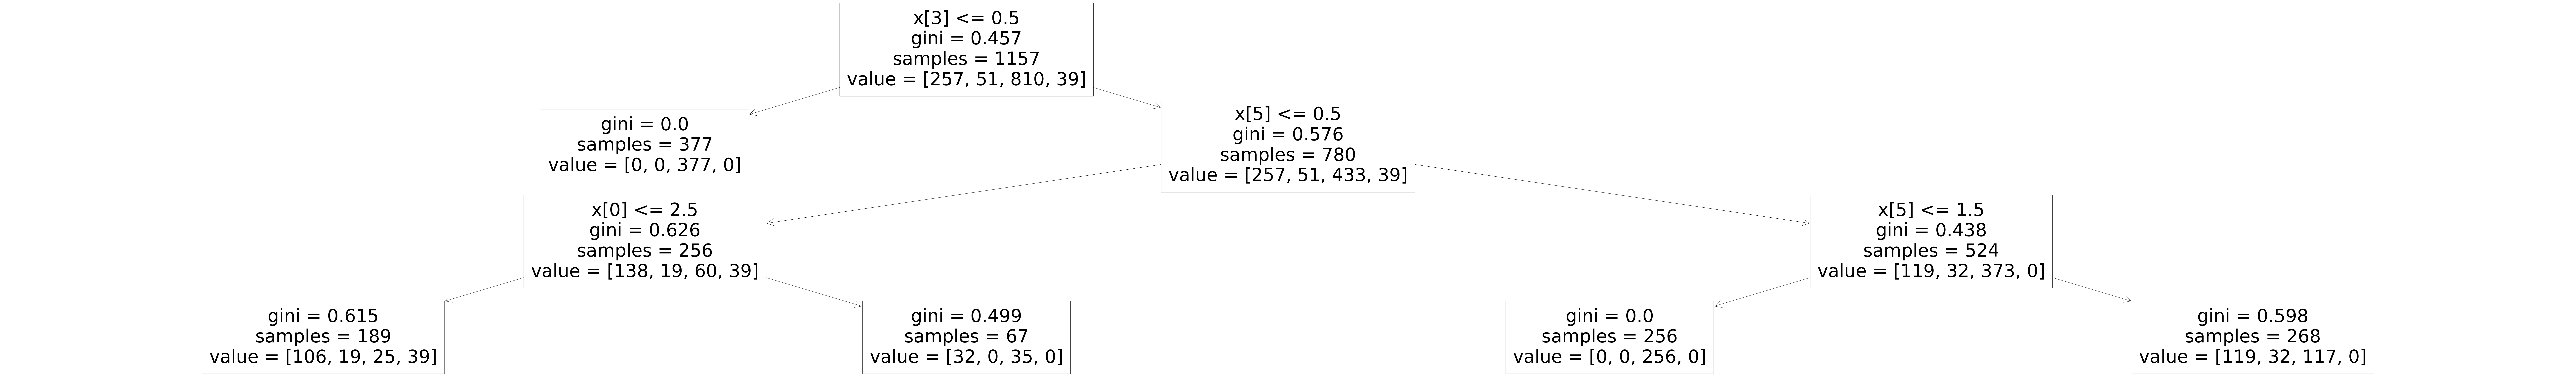

In [22]:
plt.figure(figsize=(200,30))

from sklearn import tree
#change the model name
tree.plot_tree(dt.fit(X_train, y_train))

Decision Tree Classifier with criterion gini index,max_depth=10, random_state=0

In [23]:
#YOUR CODE HERE
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)
clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9596


Decision Tree Classifier with criterion entripy index,max_depth=8, random_state=0

In [24]:
#YOUR CODE HERE
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)
clf_en.fit(X_train, y_train)

y_pred_en = clf_en.predict(X_test)
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9263


Use XGBClassifier with n_estimators=1000 and learning_rate=0.01

In [25]:
# XGBClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

from xgboost import XGBClassifier
clf_xgb = XGBClassifier()
clf_xgb.fit(X = X_train,y =  y_train)

y_pred = clf_xgb.predict(X_test)
y_pred = le.inverse_transform(y_pred)




Visualize XGBClassifier

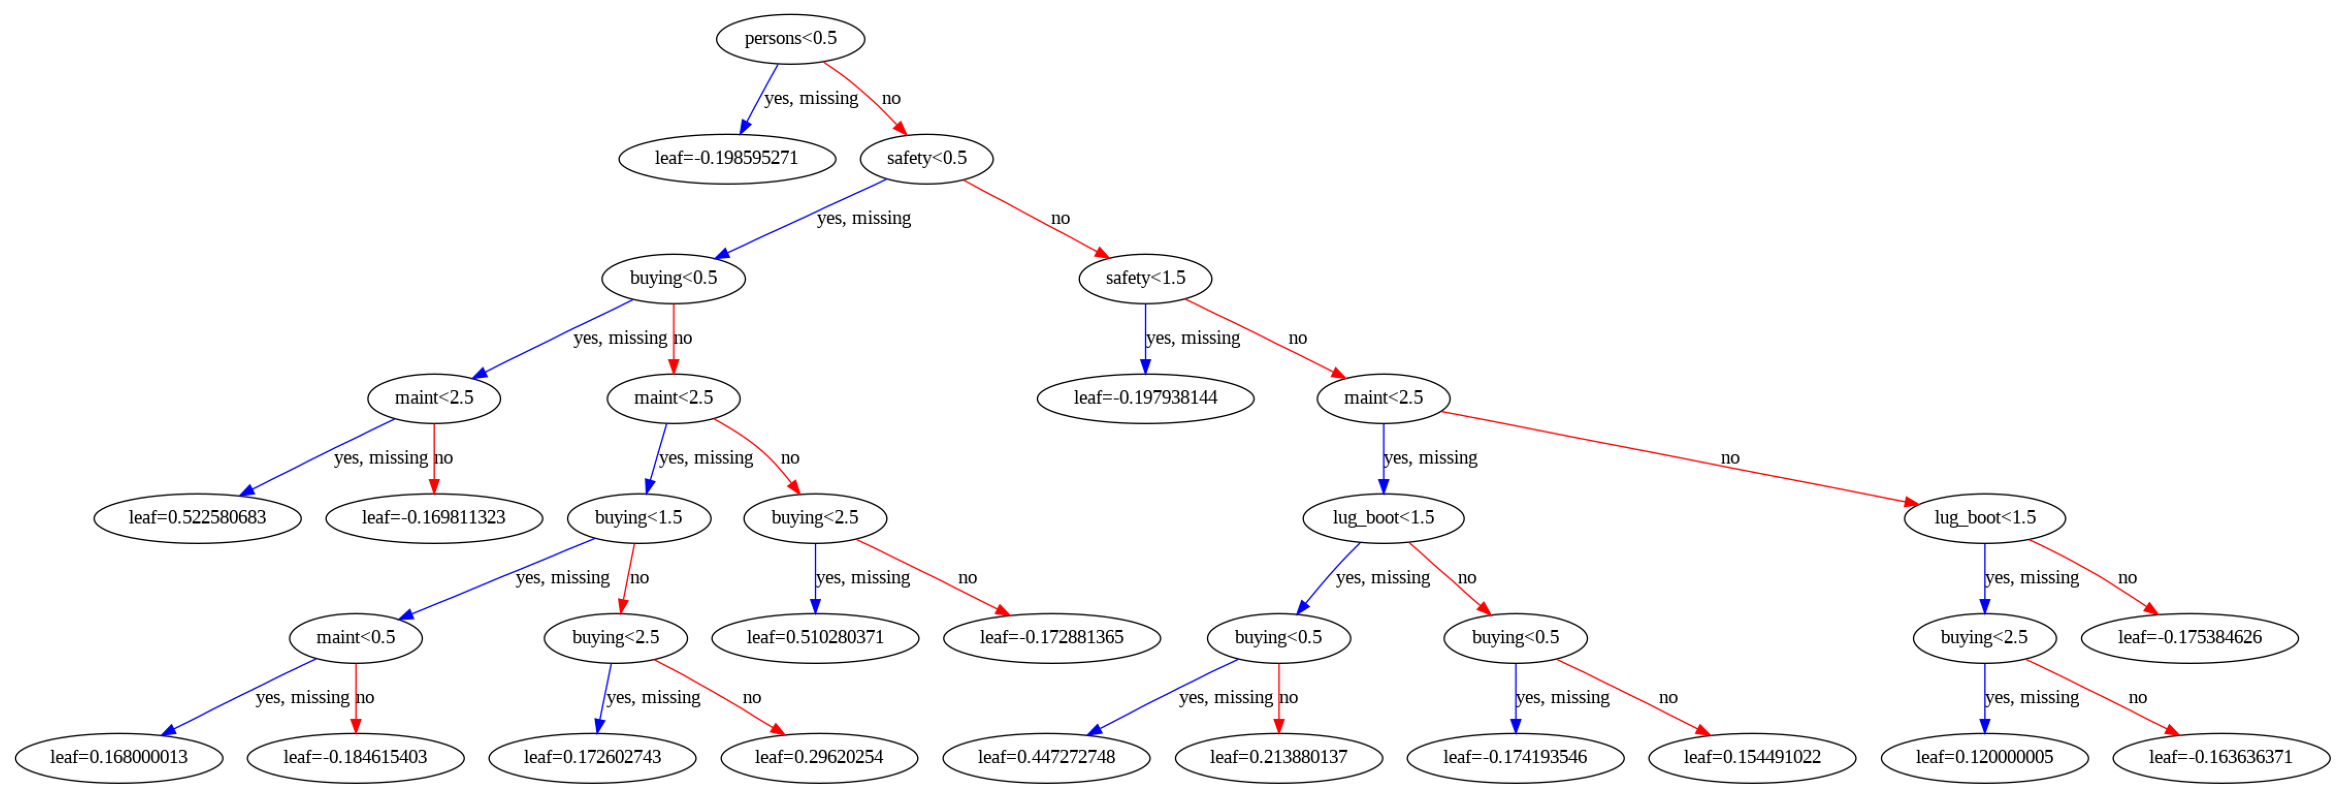

In [26]:
from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(clf_xgb.fit(X_train, y_train), ax=ax)
plt.show()

Now, heres a task for you. Try XGBRFClassifier on your own.

Training set score: 0.9231


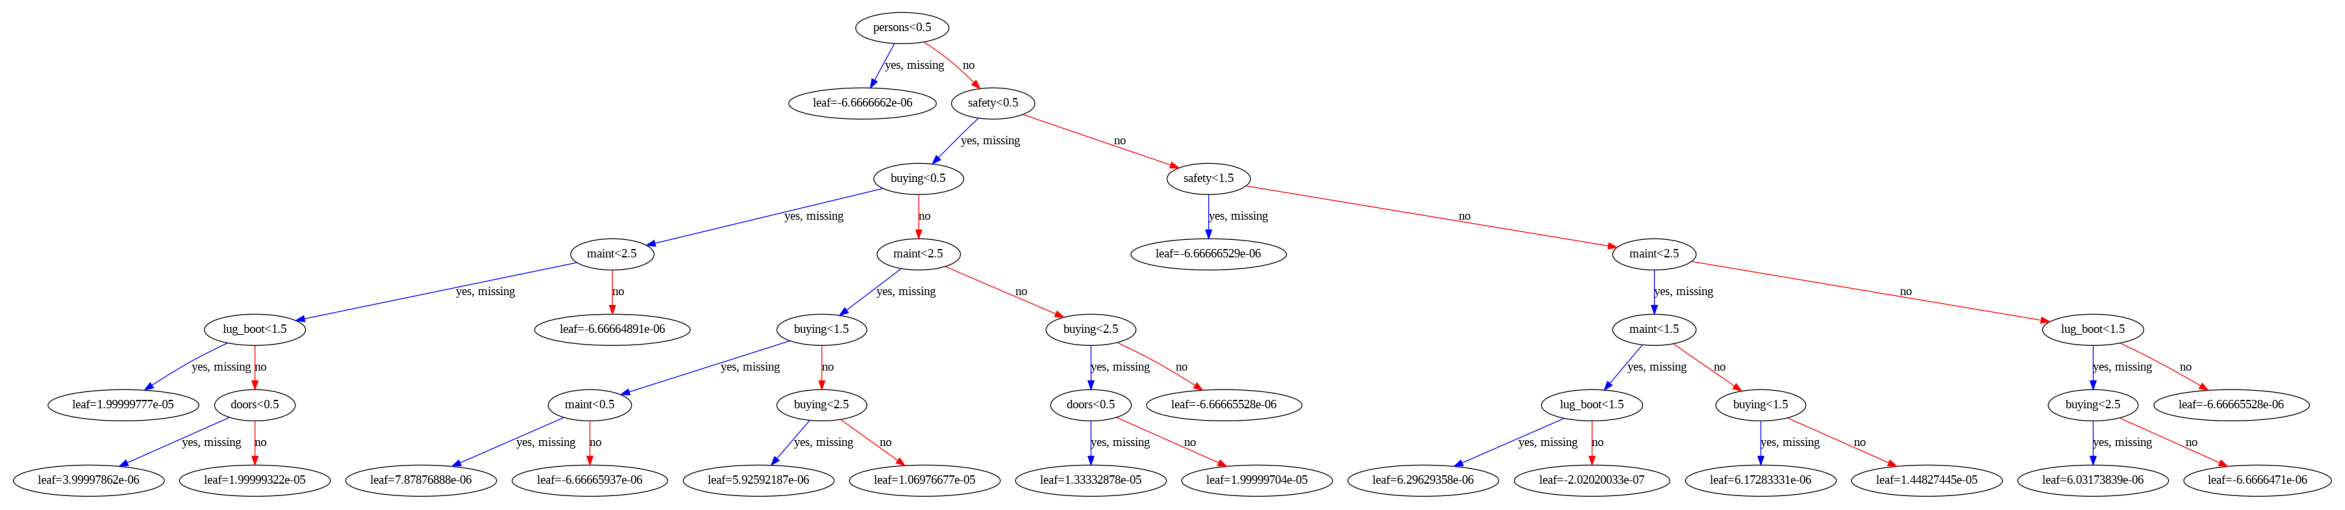

In [27]:
# XGBRFClassifier
import xgboost as xgb
clf_xgb = xgb.XGBRFClassifier(n_estimators=1000, learning_rate=0.01)


clf_xgb.fit(X_train, y_train)
y_pred_xgb = clf_xgb.predict(X_test)
print('Training set score: {:.4f}'.format(clf_xgb.score(X_train, y_train)))

from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(clf_xgb.fit(X_train, y_train), ax=ax)
plt.show()


Plot the Confusion Matrix for XGBClassifier with parameters n_estimators=1000, learning_rate=0.1

In [28]:
# Cell to plot Confusion Matrix
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
clf_xgb1 = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.1)
clf_xgb1.fit(X_train, y_train)
y_pred_xgb = clf_xgb1.predict(X_test)
cm = confusion_matrix(y_test.astype(str), y_pred_xgb.astype(str))
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [123   3   0   1   0   0   0   0]
 [  1  13   0   4   0   0   0   0]
 [  0   0 399   0   0   0   0   0]
 [  1   0   0  25   0   0   0   0]]


8. Find the feature importance for XGBClassifier.

*Hint: It's an inbuilt member variable*

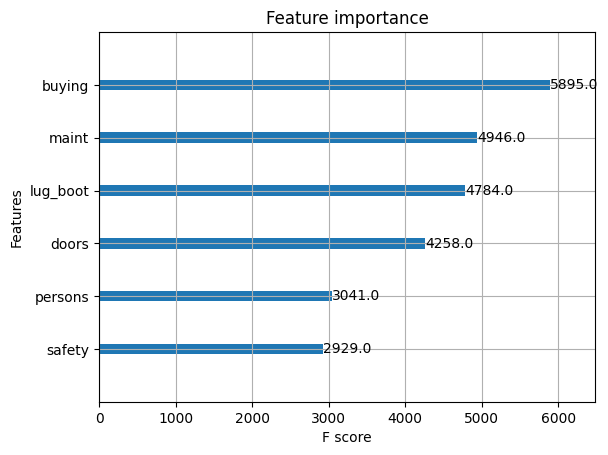

In [29]:
# Cell to find Feature Importance
from xgboost import plot_importance
plot_importance(clf_xgb1)
plt.show()


**Classification Report**
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification for XGBClassifierwith parameters n_estimators=1000, learning_rate=0.1

In [30]:
print(classification_report(y_test.astype(str), y_pred_xgb.astype(str)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
         acc       0.00      0.00      0.00     127.0
        good       0.00      0.00      0.00      18.0
       unacc       0.00      0.00      0.00     399.0
       vgood       0.00      0.00      0.00      26.0

    accuracy                           0.00     570.0
   macro avg       0.00      0.00      0.00     570.0
weighted avg       0.00      0.00      0.00     570.0

